In [2]:
%%capture

"""
install the upgraded giverny package.
    - n.b. this only needs to be run once in your new container.
    - TEMPORARY until the new giverny package is installed by default in SciServer containers.
"""
!pip install --upgrade giverny

<hr style = "height:6px;border:none;background-color:sienna">

<h2 style = "font-weight:bold;font-style:italic">
    Getcutout_JHTDB_2 demo notebook
</h2>

<p style = "font-weight:bold;font-size:13px">
    &emsp;n.b. requires python 3.9+
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> :
    <br>
    &emsp;- SciServer processing of JHTDB datasets.
    <br><br>
    <u>supported datasets</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        isotropic1024coarse &ensp;: &ensp;isotropic 1024-cube (coarse).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic1024fine &ensp;: &ensp;isotropic 1024-cube (fine).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic4096 &ensp;: &ensp;isotropic 4096-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic8192 &ensp;: &ensp;isotropic 8192-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        sabl2048low &ensp;: &ensp;stable atmospheric boundary layer 2048-cube, low-rate timestep.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        sabl2048high &ensp;: &ensp;stable atmospheric boundary layer 2048-cube, high-rate timestep.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        rotstrat4096 &ensp;: &ensp;rotating stratified 4096-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        mhd1024 &ensp;: &ensp;magneto-hydrodynamic isotropic 1024-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        mixing &ensp;: &ensp;homogeneous buoyancy driven 1024-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        channel &ensp;: &ensp;channel flow.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        channel5200 &ensp;: &ensp;channel flow (reynolds number 5200).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        transition_bl &ensp;: &ensp;transitional boundary layer.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>functions</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        getCutout &ensp;: &ensp;read data for a user-specified box.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        write_cutout_hdf5_and_xmf_files &ensp;: &ensp;write getCutout results to .h5 and .xmf files.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        cutout_values &ensp;: &ensp;see values for specific point(s) in the getCutout data.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        contour_plot &ensp;: &ensp;create a contour plot of getCutout data.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    instantiate dataset
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- instantiate the dataset and cache the metadata.
    <br>

</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        auth_token &ensp;: &ensp;turbulence user authorization token.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        dataset_title &ensp;: &ensp;name of the turbulence dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        output_path &ensp;: &ensp;folder path in the "scratch" folder of the "Temporary" directory of the user's SciServer container.
        <br>
        &emsp;- default (if left blank) &ensp;: &ensp;/home/idies/workspace/Temporary/USERNAME/scratch/turbulence_output
        <br>
        &emsp;- output files will be saved in this folder.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [3]:
"""
instantiate dataset
"""
from giverny.turbulence_dataset import *
from giverny.turbulence_toolkit import *

auth_token = 'edu.jhu.pha.turbulence.testing-201406'
dataset_title = 'sabl2048low'#'sabl2048high'
output_path = ''

# instantiate the dataset.
dataset = turb_dataset(dataset_title = dataset_title, output_path = output_path, auth_token = auth_token)

In [29]:
dataset

<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    getCutout
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- retrieve the user-requested box.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>steps</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        step 1 &ensp;: &ensp;identify the database files to be read.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        step 2 &ensp;: &ensp;read the database files and store the data in a matrix.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        x_range, y_range, z_range &ensp;: &ensp;axes ranges defining the box for which data values will be read.
        <br>
        &emsp;- specify each axis range as [minimum, maximum].
    </li>
    <li style = "font-weight:bold;font-size:13px">
        x_stride, y_stride, z_stride &ensp;: &ensp;axes strides, i.e. the number of points between each step along the axes.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        variable &ensp;: &ensp;type of data (velocity, pressure, energy, temperature, force, magneticfield, vectorpotential, density).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        timepoint &ensp;: &ensp;snapshot number.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        result &ensp;: &ensp;matrix corresponding to variable at timepoint in axes_ranges with strides.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [3]:
"""
process getCutout data
"""
variable = 'temperature'
timepoint = 1

x_range = [1, 2048]#1]
y_range = [1, 2048]
z_range = [1, 1]#2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)


-----
getCutout is processing...

total time elapsed = 1.882 seconds (0.031 minutes)

query completed successfully.
-----


<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    contour plot
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- create a contour plot from the getCutout data.
    <br>
    &emsp;- note: one of the axis ranges should be a single point, e.g. z_plot_range = [3, 3], since the contour plot is 2-dimensional.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        dataset &ensp;: &ensp;the instantiated dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         axes_ranges, strides &ensp;: &ensp;parameters used by getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         result &ensp;: &ensp;output from getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        x_plot_range &ensp;: &ensp;x-axis plot range.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        y_plot_range &ensp;: &ensp;y-axis plot range.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        z_plot_range &ensp;: &ensp;z-axis plot range.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         plot_ranges &ensp;: &ensp;combined array of x_plot_range, y_plot_range, and z_plot_range.
    </li>
    <br>
    <li style = "font-weight:bold;font-size:13px">
        plot_component &ensp;: &ensp;the component (column) of the values to plot.
        <br>
        &emsp;- 0 corresponds to the "ux" component of the velocity data or the scalar magnitude of the scalar data (e.g. pressure).
        <br>
        &emsp;- 1 corresponds to the "uy" component of the velocity data.
        <br>
        &emsp;- 2 corresponds to the "uz" component of the velocity data.
    </li>
    <br>
    <li style = "font-weight:bold;font-size:13px">
        output_filename &ensp;: &ensp;filename for the contour plot to be saved in the output_path folder.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        contour plot &ensp;: &ensp;displayed in the notebook and saved to output_filename in the output_path folder.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [30]:
result

<xarray.Dataset>
Dimensions:        (zcoor_uv: 1, ycoor: 2048, xcoor: 2048, values: 3, zcoor_w: 1)
Coordinates:
  * zcoor_uv       (zcoor_uv) float32 0.09766
  * ycoor          (ycoor) float32 0.0 0.1953 0.3906 ... 399.4 399.6 399.8
  * xcoor          (xcoor) float32 0.0 0.1953 0.3906 ... 399.4 399.6 399.8
  * zcoor_w        (zcoor_w) float32 0.1953
Dimensions without coordinates: values
Data variables:
    Velocity_0001  (zcoor_uv, ycoor, xcoor, values) float32 0.3423 ... 0.01366
Attributes: (12/14)
    dataset:      sabl2048low
    t_start:      1
    t_end:        1
    t_step:       1
    x_start:      1
    y_start:      1
    ...           ...
    y_end:        2048
    z_end:        1
    x_step:       1
    y_step:       1
    z_step:       1
    filterWidth:  1

## Temperature Contours

generating contour plot...
-----


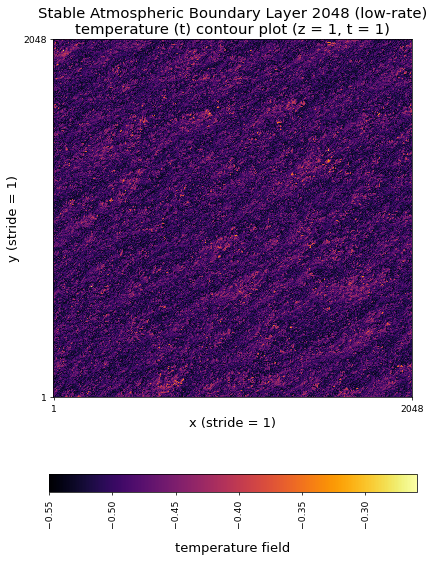

-----
contour plot created successfully.


In [4]:
"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

plot_component = 0

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)


-----
getCutout is processing...

total time elapsed = 2.144 seconds (0.036 minutes)

query completed successfully.
-----
generating contour plot...
-----


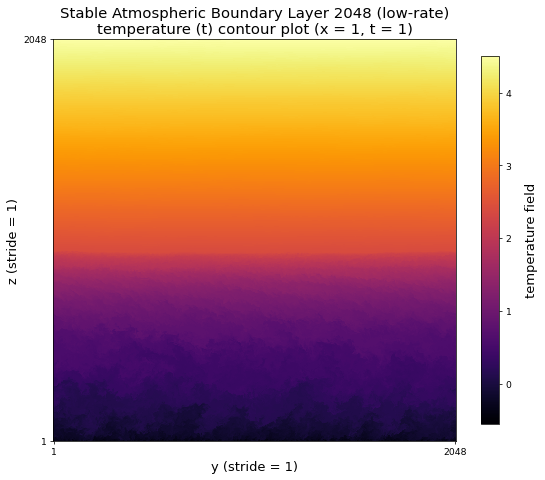

-----
contour plot created successfully.


In [5]:
"""
process getCutout data
"""
variable = 'temperature'
timepoint = 1

x_range = [1, 1]#2048]
y_range = [1, 2048]
z_range = [1, 2048]#2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

plot_component = 0

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)


-----
getCutout is processing...

total time elapsed = 1.630 seconds (0.027 minutes)

query completed successfully.
-----
generating contour plot...
-----


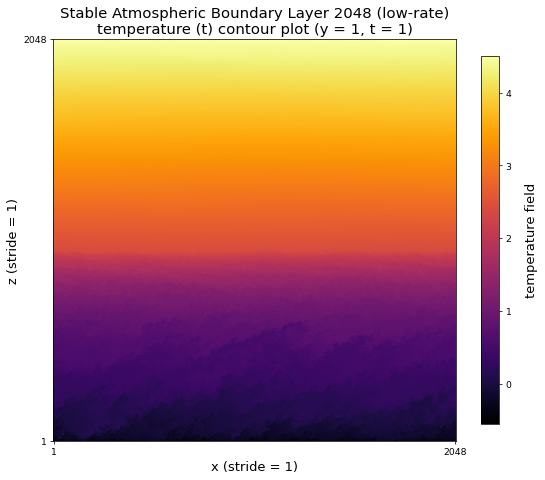

-----
contour plot created successfully.


In [7]:
"""
process getCutout data
"""
variable = 'temperature'
timepoint = 1

x_range = [1, 2048]
y_range = [1, 1]#2048]
z_range = [1, 2048]#2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

plot_component = 0

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)

## temperature mean across Z statistic

In [ ]:
%%capture

xy_means = []

for i in range(1, 2049, 50):
    variable = 'temperature'
    timepoint = 1

    x_range = [1, 2048]
    y_range = [1, 2048]
    z_range = [i, i]

    x_stride = 1
    y_stride = 1
    z_stride = 1

    """
    use the tools and processing gizmos.
    """
    # combine all of the axis data together for simplicity.
    axes_ranges = np.array([x_range, y_range, z_range])
    strides = np.array([x_stride, y_stride, z_stride])

    # process a brick cutout.
    result = getCutout(dataset, variable, timepoint, axes_ranges, strides)
    xy_means.append(result.mean())

In [7]:
a = [i.to_array().item() for i in xy_means]

Text(0, 0.5, 'Average Temperature')

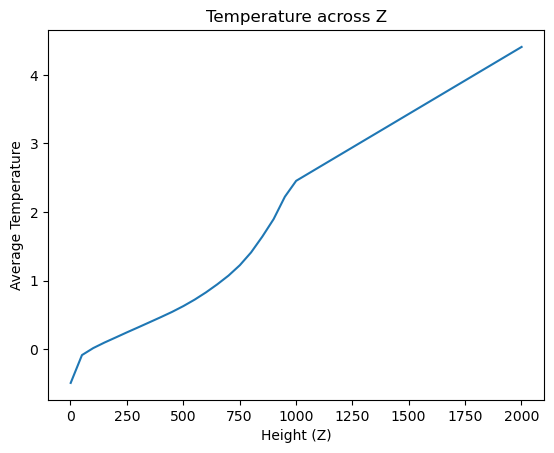

In [8]:
from matplotlib import pyplot as plt

plt.plot(list(range(1, 2049, 50)), a)

plt.title("Temperature across Z")

plt.xlabel("Height (Z)")
plt.ylabel("Average Temperature")

In [ ]:
%%capture

yz_means = []

for i in range(1, 2049, 50):
    variable = 'temperature'
    timepoint = 1

    x_range = [i, i]
    y_range = [1, 2048]
    z_range = [1, 2048]

    x_stride = 1
    y_stride = 1
    z_stride = 1

    """
    use the tools and processing gizmos.
    """
    # combine all of the axis data together for simplicity.
    axes_ranges = np.array([x_range, y_range, z_range])
    strides = np.array([x_stride, y_stride, z_stride])

    # process a brick cutout.
    result = getCutout(dataset, variable, timepoint, axes_ranges, strides)
    yz_means.append(result.mean())

In [10]:
across_x = [i.to_array().item() for i in yz_means]

Text(0, 0.5, 'Average Temperature')

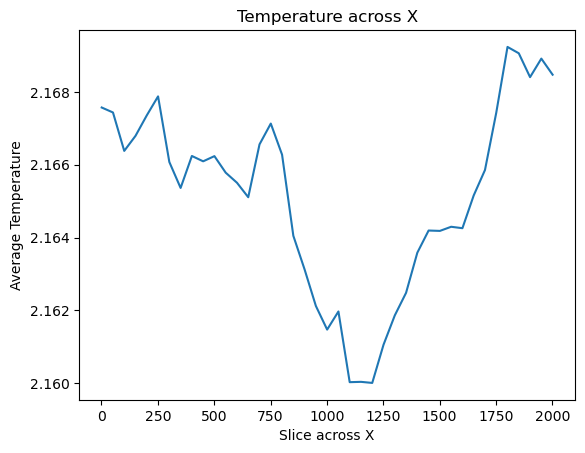

In [11]:
from matplotlib import pyplot as plt

plt.plot(list(range(1, 2049, 50)), across_x)

plt.title("Temperature across X")

plt.xlabel("Slice across X")
plt.ylabel("Average Temperature")

## Energy

In [7]:
variable = 'energy'
timepoint = 1


-----
getCutout is processing...

total time elapsed = 7.638 seconds (0.127 minutes)

query completed successfully.
-----
generating contour plot...
-----


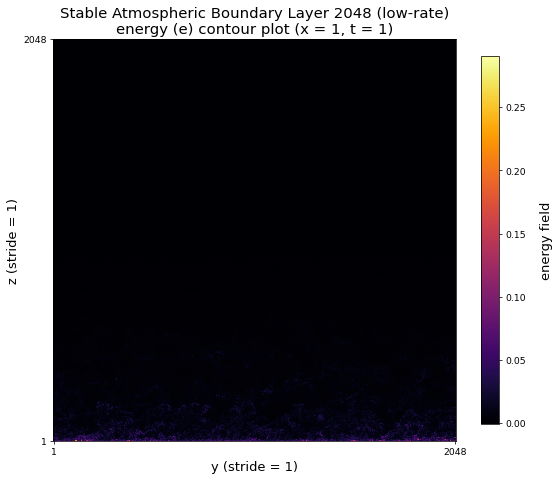

-----
contour plot created successfully.


In [8]:
"""
process getCutout data
"""

x_range = [1, 1]#2048]
y_range = [1, 2048]
z_range = [1, 2048]#2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

plot_component = 0

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)


-----
getCutout is processing...

total time elapsed = 6.361 seconds (0.106 minutes)

query completed successfully.
-----
generating contour plot...
-----


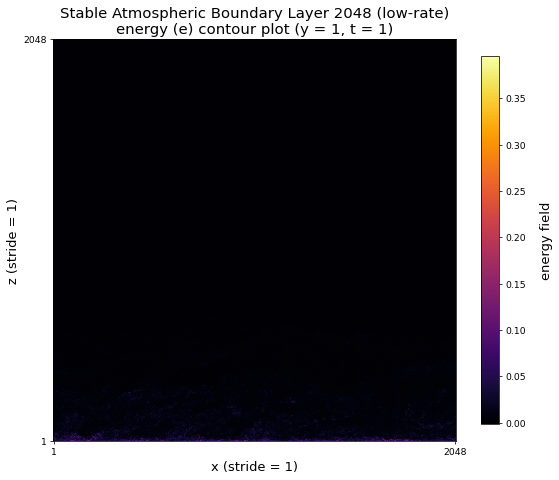

-----
contour plot created successfully.


In [9]:
"""
process getCutout data
"""

x_range = [1, 2048]
y_range = [1, 1]#2048]
z_range = [1, 2048]#2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

plot_component = 0

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)


-----
getCutout is processing...

total time elapsed = 6.110 seconds (0.102 minutes)

query completed successfully.
-----
generating contour plot...
-----


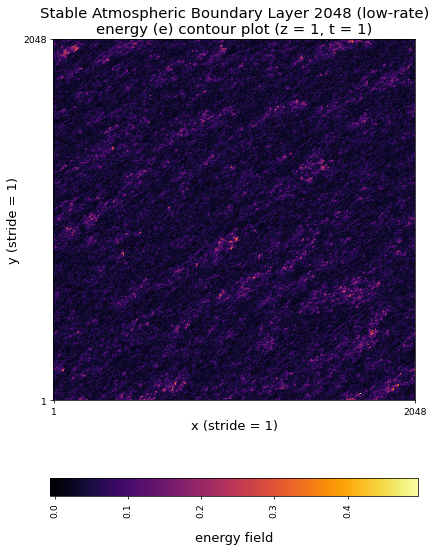

-----
contour plot created successfully.


In [10]:
"""
process getCutout data
"""

x_range = [1, 2048]
y_range = [1, 2048]
z_range = [1, 1]#2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

plot_component = 0

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)

## Pressure

In [11]:
variable = 'pressure'
timepoint = 1


-----
getCutout is processing...

total time elapsed = 7.592 seconds (0.127 minutes)

query completed successfully.
-----
generating contour plot...
-----


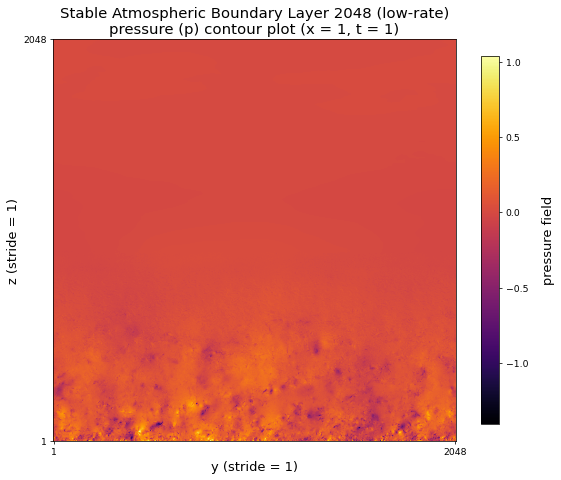

-----
contour plot created successfully.


In [12]:
"""
process getCutout data
"""

x_range = [1, 1]#2048]
y_range = [1, 2048]
z_range = [1, 2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

plot_component = 0

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)


-----
getCutout is processing...

total time elapsed = 6.072 seconds (0.101 minutes)

query completed successfully.
-----
generating contour plot...
-----


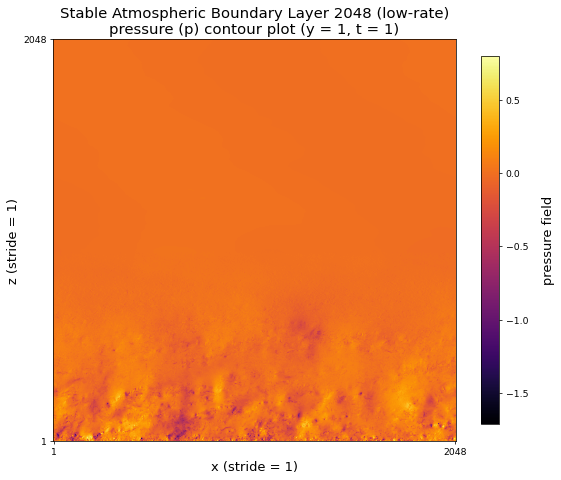

-----
contour plot created successfully.


In [13]:
"""
process getCutout data
"""

x_range = [1, 2048]
y_range = [1, 1]#2048]
z_range = [1, 2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

plot_component = 0

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)


-----
getCutout is processing...

total time elapsed = 5.948 seconds (0.099 minutes)

query completed successfully.
-----
generating contour plot...
-----


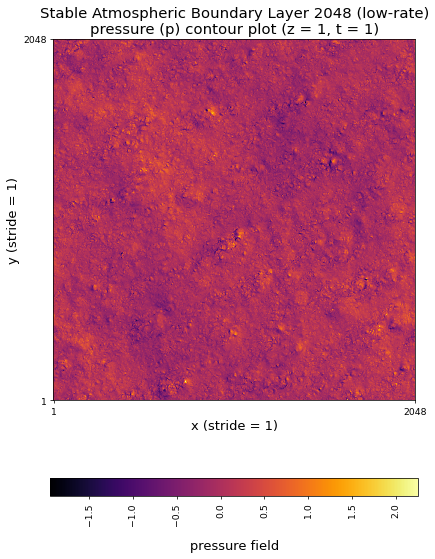

-----
contour plot created successfully.


In [14]:
"""
process getCutout data
"""

x_range = [1, 2048]
y_range = [1, 2048]
z_range = [1, 1]#2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

plot_component = 0

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)

## Velocity - u

In [17]:
variable = 'velocity'
timepoint = 1

plot_component = 0 # ux component


-----
getCutout is processing...

total time elapsed = 9.247 seconds (0.154 minutes)

query completed successfully.
-----
generating contour plot...
-----


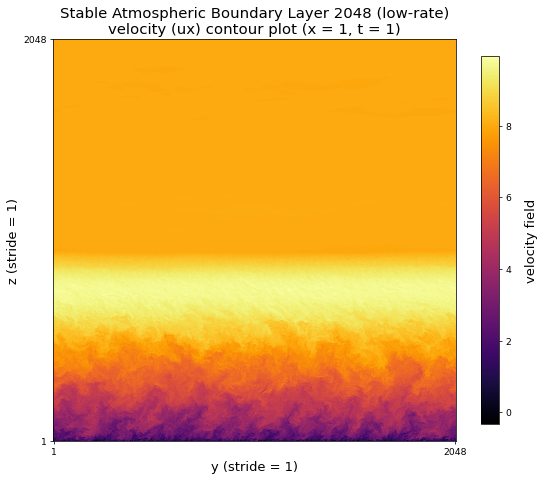

-----
contour plot created successfully.


In [18]:
"""
process getCutout data
"""

x_range = [1, 1]#2048]
y_range = [1, 2048]
z_range = [1, 2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)


-----
getCutout is processing...

total time elapsed = 7.859 seconds (0.131 minutes)

query completed successfully.
-----
generating contour plot...
-----


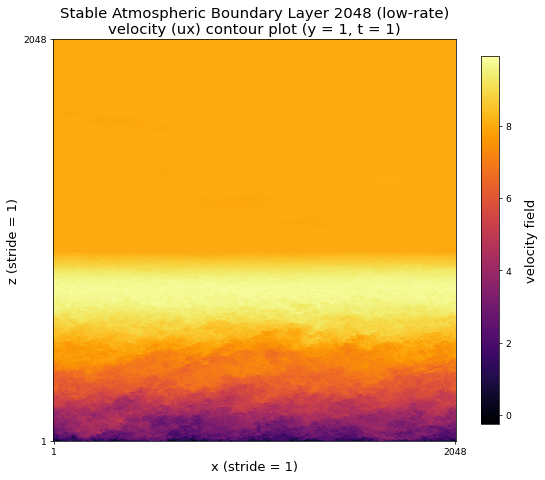

-----
contour plot created successfully.


In [19]:
"""
process getCutout data
"""

x_range = [1, 2048]
y_range = [1, 1]#2048]
z_range = [1, 2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)


-----
getCutout is processing...

total time elapsed = 3.860 seconds (0.064 minutes)

query completed successfully.
-----
generating contour plot...
-----


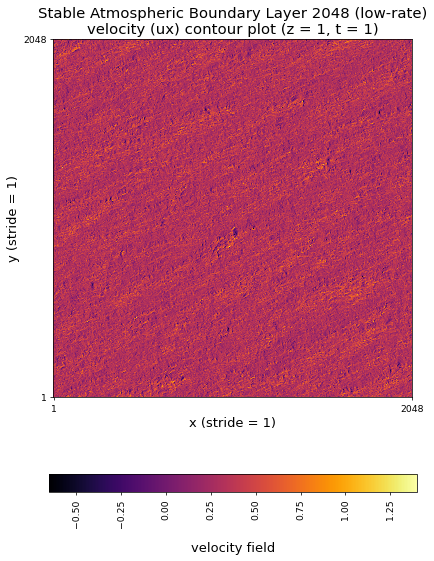

-----
contour plot created successfully.


In [20]:
"""
process getCutout data
"""

x_range = [1, 2048]
y_range = [1, 2048]
z_range = [1, 1]#2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)

## Velocity - v

In [21]:
variable = 'velocity'
timepoint = 1

plot_component = 1 # ux component


-----
getCutout is processing...

total time elapsed = 4.013 seconds (0.067 minutes)

query completed successfully.
-----
generating contour plot...
-----


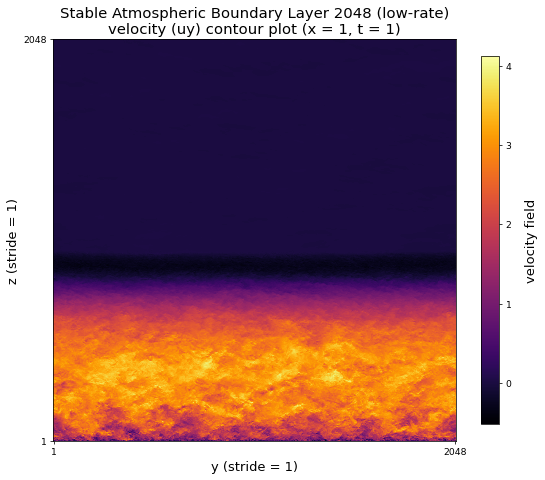

-----
contour plot created successfully.


In [22]:
"""
process getCutout data
"""

x_range = [1, 1]#2048]
y_range = [1, 2048]
z_range = [1, 2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)


-----
getCutout is processing...

total time elapsed = 3.978 seconds (0.066 minutes)

query completed successfully.
-----
generating contour plot...
-----


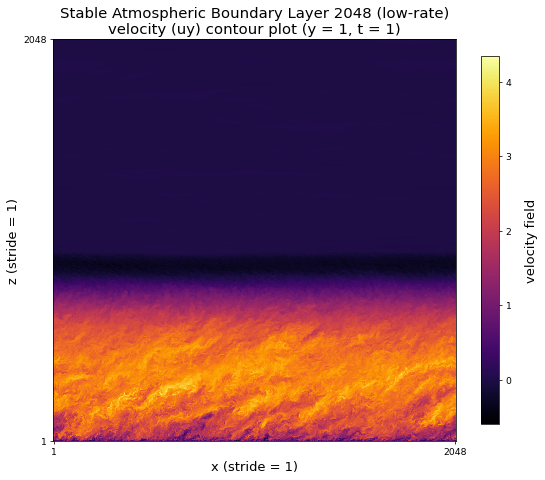

-----
contour plot created successfully.


In [23]:
"""
process getCutout data
"""

x_range = [1, 2048]
y_range = [1, 1]#2048]
z_range = [1, 2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)


-----
getCutout is processing...

total time elapsed = 1.289 seconds (0.021 minutes)

query completed successfully.
-----
generating contour plot...
-----


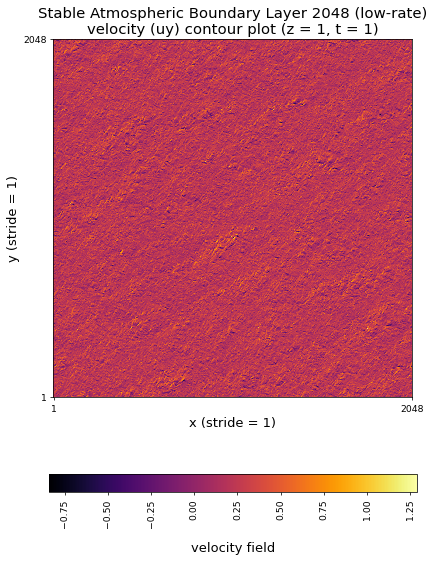

-----
contour plot created successfully.


In [24]:
"""
process getCutout data
"""

x_range = [1, 2048]
y_range = [1, 2048]
z_range = [1, 1]#2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)

## Velocity - uw

In [25]:
variable = 'velocity'
timepoint = 1

plot_component = 2


-----
getCutout is processing...

total time elapsed = 1.334 seconds (0.022 minutes)

query completed successfully.
-----
generating contour plot...
-----


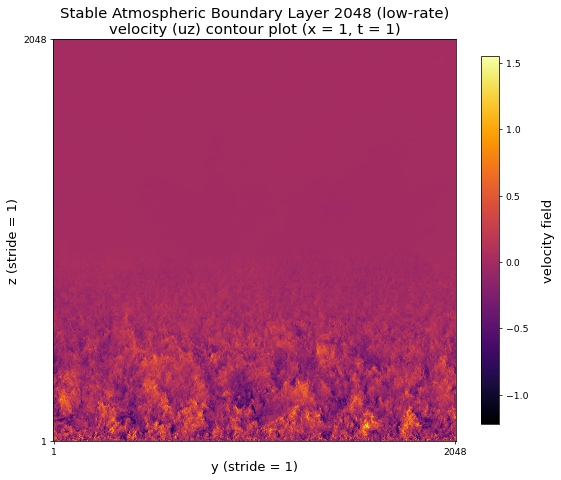

-----
contour plot created successfully.


In [26]:
"""
process getCutout data
"""

x_range = [1, 1]#2048]
y_range = [1, 2048]
z_range = [1, 2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)


-----
getCutout is processing...

total time elapsed = 1.257 seconds (0.021 minutes)

query completed successfully.
-----
generating contour plot...
-----


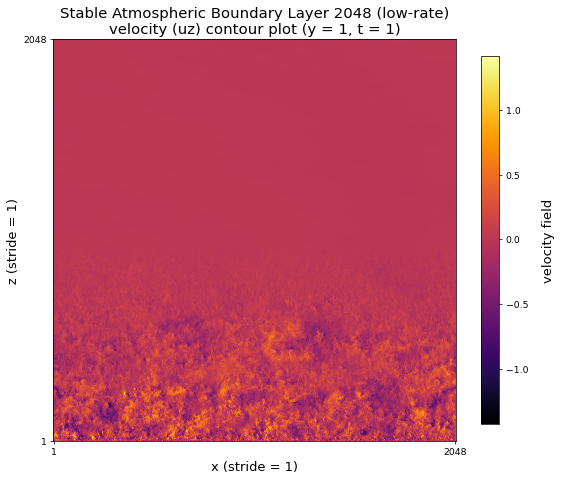

-----
contour plot created successfully.


In [27]:
"""
process getCutout data
"""

x_range = [1, 2048]
y_range = [1, 1]#2048]
z_range = [1, 2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)


-----
getCutout is processing...

total time elapsed = 1.194 seconds (0.020 minutes)

query completed successfully.
-----
generating contour plot...
-----


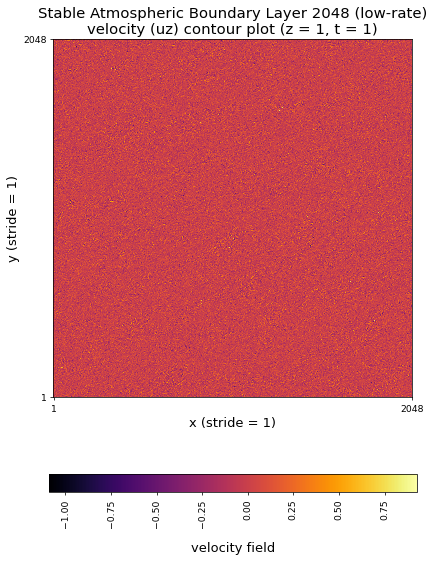

-----
contour plot created successfully.


In [28]:
"""
process getCutout data
"""

x_range = [1, 2048]
y_range = [1, 2048]
z_range = [1, 1]#2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)



"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)